In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_FRMnew.csv to df_FRMnew.csv
Saving Copy of gec_txn.csv to Copy of gec_txn.csv
Saving Copy of gec_geography.csv to Copy of gec_geography.csv
Saving Copy of gec_user_info.csv to Copy of gec_user_info.csv


In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_RFM = pd.read_csv('df_FRMnew.csv')
df_transactions = pd.read_csv('Copy of gec_txn.csv')
df_geography = pd.read_csv('Copy of gec_geography.csv')
df_userinfo = pd.read_csv('Copy of gec_user_info.csv')

**TIỀN XỬ LÍ DỮ LIỆU**

In [ ]:
df_transactions

,user_id,date,platform,volume,fee
0,4.0,1/29/2023,web,27.560834,0.000000
1,4.0,2/25/2023,web,50.584032,0.000000
2,4.0,2/24/2023,web,50.270878,0.000000
3,4.0,2/23/2023,web,52.444955,0.000000
4,4.0,2/27/2023,web,52.572346,0.000000
...,...,...,...,...,...
139308,NaN,1/2/2023,ios,0.803061,0.000642
139309,NaN,1/15/2023,web,51.036020,0.040829
139310,NaN,2/11/2023,web,9.185382,0.000000
139311,NaN,2/11/2023,web,0.838060,0.000000


In [ ]:
df_geography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              257 non-null    object 
 1   Alpha-2_code         256 non-null    object 
 2   Latitude_(average)   256 non-null    float64
 3   Longitude_(average)  256 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.2+ KB


In [ ]:
df_geography

,Country,Alpha-2_code,Latitude_(average),Longitude_(average)
0,Afghanistan,AF,33.0000,65.0
1,Albania,AL,41.0000,20.0
2,Algeria,DZ,28.0000,3.0
3,American Samoa,AS,-14.3333,-170.0
4,Andorra,AD,42.5000,1.6
...,...,...,...,...
252,Western Sahara,EH,24.5000,-13.0
253,Yemen,YE,15.0000,48.0
254,Zambia,ZM,-15.0000,30.0
255,Zimbabwe,ZW,-20.0000,30.0


In [ ]:
#XÓA CÁC DUPLICATES
df_geo_unique = df_geography.drop_duplicates(subset=['Alpha-2_code'], keep='first')
df_geo_unique

,Country,Alpha-2_code,Latitude_(average),Longitude_(average)
0,Afghanistan,AF,33.0000,65.0
1,Albania,AL,41.0000,20.0
2,Algeria,DZ,28.0000,3.0
3,American Samoa,AS,-14.3333,-170.0
4,Andorra,AD,42.5000,1.6
...,...,...,...,...
252,Western Sahara,EH,24.5000,-13.0
253,Yemen,YE,15.0000,48.0
254,Zambia,ZM,-15.0000,30.0
255,Zimbabwe,ZW,-20.0000,30.0


In [ ]:
df_userinfo

,user_id,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
0,1.0,mobile,Surabaya,Android,ID,11/1/2022,NaN,NaN,NaN,NaN
1,15664.0,mobile,Coro,Windows,VE,2/23/2023,2/23/2023,2.0,1.0,65.000000
2,440.0,mobile,Dhaka,Android,BD,2/8/2023,2/8/2023,5.0,3.0,425.363636
3,8449.0,mobile,Copenhagen,Windows,DK,2/13/2023,NaN,NaN,NaN,NaN
4,20791.0,web,Ho Chi Minh City,Linux,VN,2/6/2023,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
122309,37329.0,mobile,Kolkata,Android,IN,11/19/2022,NaN,NaN,NaN,NaN
122310,37330.0,mobile,NaN,Android,BD,10/16/2022,NaN,NaN,NaN,NaN
122311,37332.0,mobile,Surabaya,Android,ID,11/24/2022,NaN,NaN,NaN,NaN
122312,37333.0,mobile,Dhaka,Android,BD,10/10/2022,NaN,NaN,NaN,NaN


In [ ]:
#Nối bảng Cluster với bảng Transactions
merged_df = df_RFM.merge(df_transactions, left_on = 'user_id', right_on = 'user_id', how = 'left')

merged_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,date,platform,volume,fee
0,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",1/29/2023,web,27.560834,0.0
1,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",2/25/2023,web,50.584032,0.0
2,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",2/24/2023,web,50.270878,0.0
3,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",2/23/2023,web,52.444955,0.0
4,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",2/27/2023,web,52.572346,0.0
...,...,...,...,...,...,...,...,...,...,...
139050,30679,7,8,5.891152,1,Bangladesh,2/7/2023,android,0.121092,0.0
139051,30679,7,8,5.891152,1,Bangladesh,1/31/2023,android,0.107463,0.0
139052,30679,7,8,5.891152,1,Bangladesh,1/19/2023,android,0.190316,0.0
139053,30679,7,8,5.891152,1,Bangladesh,2/16/2023,android,0.022695,0.0


In [ ]:
#Lọc ra những cluster 0
filtered_df = merged_df.loc[merged_df['Cluster'] == 0]

print(filtered_df)

        user_id  Recency  Frequency  MonetaryValue  Cluster    Country  \
102          23        1         35       0.182284        0  Indonesia   
103          23        1         35       0.182284        0  Indonesia   
104          23        1         35       0.182284        0  Indonesia   
105          23        1         35       0.182284        0  Indonesia   
106          23        1         35       0.182284        0  Indonesia   
...         ...      ...        ...            ...      ...        ...   
139032    30664        4         10       0.000027        0        NaN   
139033    30664        4         10       0.000027        0        NaN   
139034    30664        4         10       0.000027        0        NaN   
139035    30664        4         10       0.000027        0        NaN   
139036    30664        4         10       0.000027        0        NaN   

             date platform    volume  fee  
102     2/28/2023  android  0.035403  0.0  
103     2/26/2023  andr

In [ ]:
#Chuyển kiểu dữ liệu cột date thành datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

filtered_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,date,platform,volume,fee
102,23,1,35,0.182284,0,Indonesia,2023-02-28,android,0.035403,0.0
103,23,1,35,0.182284,0,Indonesia,2023-02-26,android,0.002756,0.0
104,23,1,35,0.182284,0,Indonesia,2023-02-28,android,0.002924,0.0
105,23,1,35,0.182284,0,Indonesia,2023-02-28,android,0.002924,0.0
106,23,1,35,0.182284,0,Indonesia,2023-02-28,android,0.002924,0.0
...,...,...,...,...,...,...,...,...,...,...
139032,30664,4,10,0.000027,0,NaN,2023-02-25,android,0.000003,0.0
139033,30664,4,10,0.000027,0,NaN,2023-02-25,android,0.000003,0.0
139034,30664,4,10,0.000027,0,NaN,2023-02-25,android,0.000003,0.0
139035,30664,4,10,0.000027,0,NaN,2023-02-25,android,0.000003,0.0


In [ ]:
user_id_count = filtered_df['user_id'].nunique()
country_count = filtered_df['Country'].nunique()
count = len(filtered_df)

count_by_country = filtered_df['Country'].value_counts()

print("Số lượng người giao dịch: ", user_id_count)
print("Số lượng nước: ", country_count)
print("Tổng giao dịch: ", count)
print("số lượng giao dịch của từng nước: \n", count_by_country)

Số lượng người giao dịch:  2309
Số lượng nước:  20
Tổng giao dịch:  73639
số lượng giao dịch của từng nước: 
 Pakistan          28338
Viet Nam          19413
Brazil             5602
Indonesia          4421
Spain              3028
France             2700
Poland             2254
United States      1978
Turkey             1503
Slovakia            654
Ukraine             629
Germany             495
Denmark             295
India               184
Mexico              116
Bangladesh          110
Israel               65
Hong Kong            62
Australia             5
United Kingdom        4
Name: Country, dtype: int64


**PHÂN TÍCH DỮ LIỆU**

<BarContainer object of 5 artists>

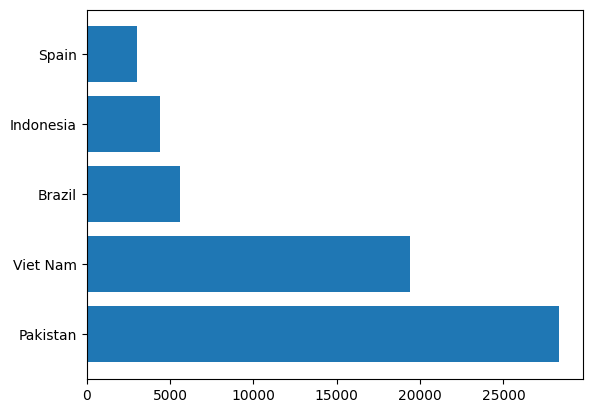

In [ ]:
grouped_C0T = filtered_df.groupby('Country').size().reset_index(name='transaction_count')
sorted_C0T = grouped_C0T.sort_values('transaction_count', ascending=False)
top_5_countries_C0T = sorted_C0T.head(5)
plt.barh(top_5_countries_C0T['Country'], top_5_countries_C0T['transaction_count'])

,Country,user_count
19,Viet Nam,619
11,Pakistan,482
2,Brazil,311
14,Spain,148
4,France,143


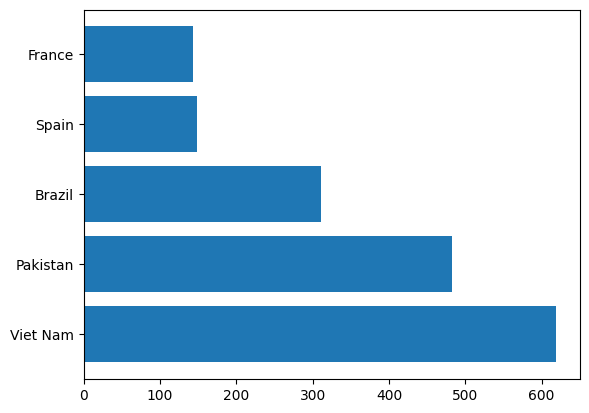

In [ ]:
grouped_C0C = filtered_df.groupby('Country')['user_id'].nunique().reset_index(name='user_count')
grouped_C0C

sorted_C0C = grouped_C0C.sort_values('user_count', ascending=False)
top_5_countries = sorted_C0C.head(5)

plt.barh(top_5_countries['Country'], top_5_countries['user_count'])
top_5_countries

In [ ]:
# các hệ điều hành khách hàng sử dụng khi thực hiện 1 transaction
value_counts = filtered_df['platform'].value_counts()
unique_values = value_counts.index
print(unique_values)

Index(['android', 'web', 'ios'], dtype='object')


In [ ]:
count_by_platform = filtered_df['platform'].value_counts()
print("Số lượng hệ điều hành được sử dụng khi thực hiện transactions: \n", count_by_platform)


Số lượng platform được sử dụng khi thực hiện transactions: 
 android    49007
web        24495
ios          137
Name: platform, dtype: int64


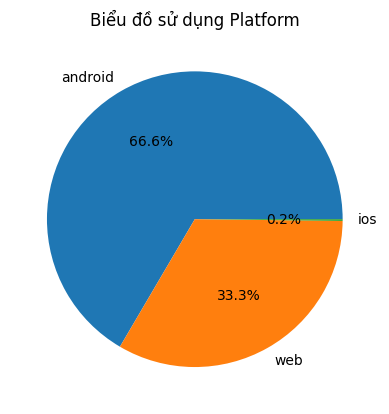

In [ ]:
count_by_platform = filtered_df['platform'].value_counts()
plt.pie(count_by_platform, labels = count_by_platform.index, autopct='%1.1f%%')
plt.title("Biểu đồ sử dụng Hệ điều hành")
plt.show()

=> Khi nhóm 0 thực hiện giao dịch, họ thường sử dụng nền tảng android

In [ ]:
#Tạo cột thứ trong bảng fitered_df
filtered_df['weekday'] = filtered_df['date'].dt.weekday
weekday_mapping = {
    0: "Thứ 2",
    1: "Thứ 3",
    2: "Thứ 4",
    3: "Thứ 5",
    4: "Thứ 6",
    5: "Thứ 7",
    6: "Chủ Nhật"
                  }

filtered_df['weekday'] = filtered_df['weekday'].map(weekday_mapping)
print(filtered_df.head())

     user_id  Recency  Frequency  MonetaryValue  Cluster    Country  \
102       23        1         35       0.182284        0  Indonesia   
103       23        1         35       0.182284        0  Indonesia   
104       23        1         35       0.182284        0  Indonesia   
105       23        1         35       0.182284        0  Indonesia   
106       23        1         35       0.182284        0  Indonesia   

          date platform    volume  fee   weekday  
102 2023-02-28  android  0.035403  0.0     Thứ 3  
103 2023-02-26  android  0.002756  0.0  Chủ Nhật  
104 2023-02-28  android  0.002924  0.0     Thứ 3  
105 2023-02-28  android  0.002924  0.0     Thứ 3  
106 2023-02-28  android  0.002924  0.0     Thứ 3  


Text(0.5, 1.0, 'Transactions theo ngày')

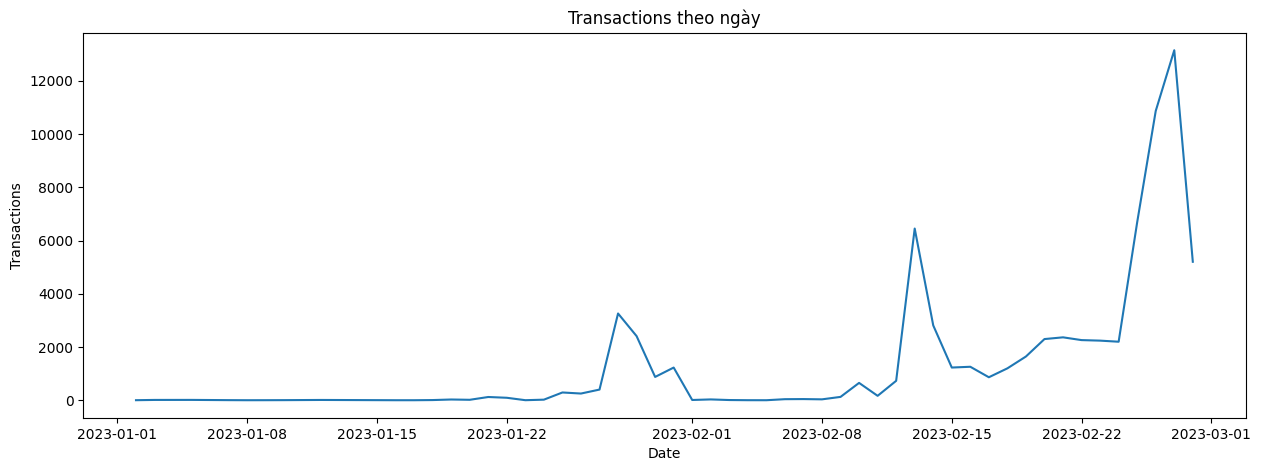

In [ ]:
#TẠO BẢNG TIME SERIES GIAO DỊCH
C0transactions_counts = filtered_df.groupby(filtered_df['date'].dt.date).size()
plt.figure(figsize = (15,5))
plt.plot(C0transactions_counts.index, C0transactions_counts.values)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Transactions theo ngày')

In [ ]:
C0data = filtered_df.groupby('weekday')['volume'].sum().reset_index()
C0data = pd.DataFrame(C0data)
C0data['volume'] = C0data['volume'].astype(int)
C0data

,weekday,volume
0,Chủ Nhật,2059
1,Thứ 2,9999
2,Thứ 3,2572
3,Thứ 4,775
4,Thứ 5,3087
5,Thứ 6,1925
6,Thứ 7,3965


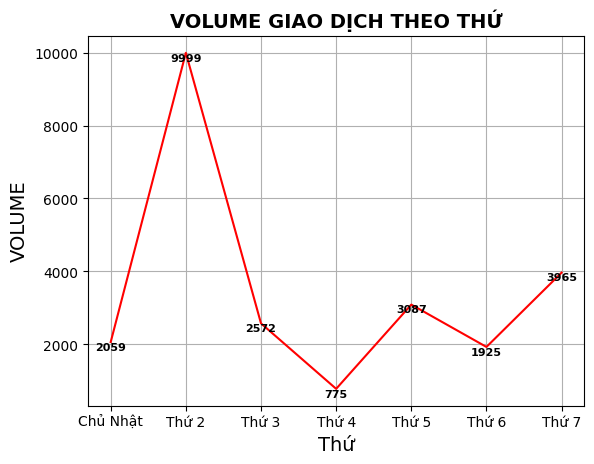

In [ ]:
#TẠO BẢNG VOLUME GIAO DỊCH THEO THỨ
plt.plot(C0data['weekday'], C0data['volume'], color = 'red')
plt.title('VOLUME GIAO DỊCH THEO THỨ', fontsize = 14, fontweight = 'bold')
plt.xlabel('Thứ', fontsize = 14)
plt.ylabel('VOLUME', fontsize = 14)
plt.grid(True)

for i, v in enumerate(C0data['volume']):
  plt.text(i, v, str(v), ha='center', va='top', fontsize=8, fontweight='bold')

plt.show()

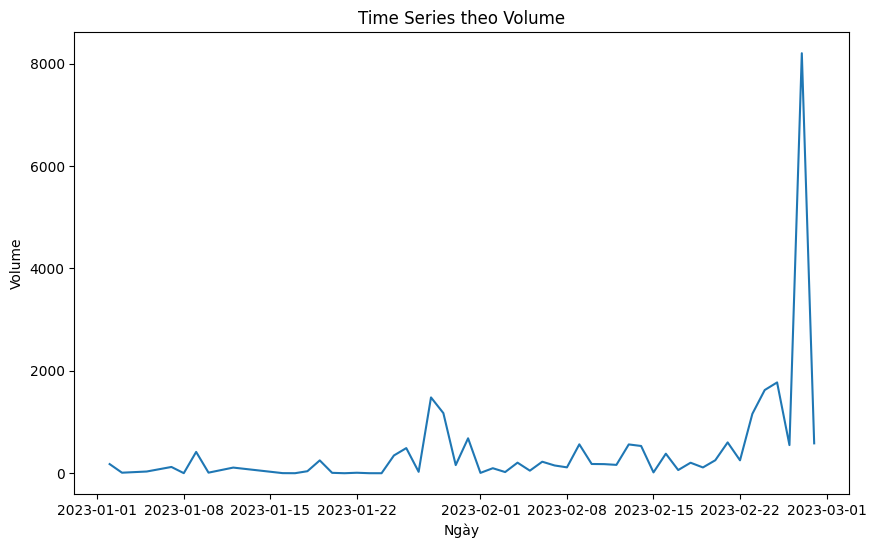

In [ ]:
#TẠO BẢNG TIME SERIES THEO VOLUME
daily_volume = filtered_df.groupby('date').sum()
plt.figure(figsize=(10,6))
plt.plot(daily_volume.index, daily_volume['volume'])
plt.title('Time Series theo Volume')
plt.xlabel('Ngày')
plt.ylabel('Volume')
plt.show()

In [ ]:
print(filtered_df[['user_id', 'Country']])

        user_id    Country
102          23  Indonesia
103          23  Indonesia
104          23  Indonesia
105          23  Indonesia
106          23  Indonesia
...         ...        ...
139032    30664        NaN
139033    30664        NaN
139034    30664        NaN
139035    30664        NaN
139036    30664        NaN

[73639 rows x 2 columns]


In [ ]:
# Nối bảng Cluster với bảng Sessions
merge_df = df_RFM.merge(df_userinfo, left_on = 'user_id', right_on = 'user_id', how = 'left')
merge_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
0,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",mobile,Coro,Windows,VE,2/22/2023,2/22/2023,6.0,1.0,1337.000000
1,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",mobile,Coro,Windows,VE,2/27/2023,2/27/2023,8.0,2.0,387.562249
2,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",web,Maracaibo,Windows,VE,1/31/2023,1/31/2023,5.0,2.0,357.425532
3,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",web,Maracaibo,Windows,VE,1/30/2023,1/30/2023,8.0,1.0,1539.000000
4,23,1,35,0.182284,0,Indonesia,mobile,Cirebon,Android,ID,2/27/2023,2/27/2023,5.0,1.0,456.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49584,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2/22/2023,2/22/2023,2.0,1.0,36.000000
49585,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,1/31/2023,1/31/2023,4.0,1.0,905.000000
49586,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,1/13/2023,1/13/2023,4.0,1.0,169.000000
49587,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,1/19/2023,1/19/2023,7.0,2.0,1097.000000


In [ ]:
#Chọn Cluster = 0
filter_df = merge_df.loc[merge_df['Cluster'] == 0]
filter_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
4,23,1,35,0.182284,0,Indonesia,mobile,Cirebon,Android,ID,2/27/2023,2/27/2023,5.0,1.0,456.000000
5,23,1,35,0.182284,0,Indonesia,mobile,Indramayu,Android,ID,2/28/2023,2/28/2023,10.0,2.0,351.626667
6,23,1,35,0.182284,0,Indonesia,mobile,Cirebon,Android,ID,2/28/2023,2/28/2023,10.0,2.0,351.626667
7,24,2,37,0.812294,0,Viet Nam,mobile,Hanoi,Android,VN,2/28/2023,2/28/2023,5.0,2.0,653.587786
8,24,2,37,0.812294,0,Viet Nam,mobile,Hanoi,Windows,VN,2/28/2023,2/28/2023,5.0,2.0,653.587786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49568,30630,1,79,28.282582,0,Viet Nam,web,Hanoi,Mac OS X,VN,12/7/2022,NaN,NaN,NaN,NaN
49569,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,12/6/2022,NaN,NaN,NaN,NaN
49570,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,12/7/2022,NaN,NaN,NaN,NaN
49571,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,12/8/2022,NaN,NaN,NaN,NaN


In [ ]:
#Chuyển kiểu dữ liệu của time, date về datetime
filter_df['time'] = pd.to_datetime(filter_df['time'])
filter_df
filter_df['date'] = pd.to_datetime(filter_df['date'])
filter_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
4,23,1,35,0.182284,0,Indonesia,mobile,Cirebon,Android,ID,2023-02-27,2023-02-27,5.0,1.0,456.000000
5,23,1,35,0.182284,0,Indonesia,mobile,Indramayu,Android,ID,2023-02-28,2023-02-28,10.0,2.0,351.626667
6,23,1,35,0.182284,0,Indonesia,mobile,Cirebon,Android,ID,2023-02-28,2023-02-28,10.0,2.0,351.626667
7,24,2,37,0.812294,0,Viet Nam,mobile,Hanoi,Android,VN,2023-02-28,2023-02-28,5.0,2.0,653.587786
8,24,2,37,0.812294,0,Viet Nam,mobile,Hanoi,Windows,VN,2023-02-28,2023-02-28,5.0,2.0,653.587786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49568,30630,1,79,28.282582,0,Viet Nam,web,Hanoi,Mac OS X,VN,2022-12-07,NaT,NaN,NaN,NaN
49569,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,2022-12-06,NaT,NaN,NaN,NaN
49570,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,2022-12-07,NaT,NaN,NaN,NaN
49571,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,2022-12-08,NaT,NaN,NaN,NaN


In [ ]:
#Tạo bảng mới không có giá trị NaN
filternn_df = filter_df.dropna(subset = ['session', 'feature', 'time_per_session', 'date'])
filternn_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
4,23,1,35,0.182284,0,Indonesia,mobile,Cirebon,Android,ID,2023-02-27,2023-02-27,5.0,1.0,456.000000
5,23,1,35,0.182284,0,Indonesia,mobile,Indramayu,Android,ID,2023-02-28,2023-02-28,10.0,2.0,351.626667
6,23,1,35,0.182284,0,Indonesia,mobile,Cirebon,Android,ID,2023-02-28,2023-02-28,10.0,2.0,351.626667
7,24,2,37,0.812294,0,Viet Nam,mobile,Hanoi,Android,VN,2023-02-28,2023-02-28,5.0,2.0,653.587786
8,24,2,37,0.812294,0,Viet Nam,mobile,Hanoi,Windows,VN,2023-02-28,2023-02-28,5.0,2.0,653.587786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49558,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,2023-01-04,2023-01-04,2.0,6.0,905.857143
49559,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,2023-01-05,2023-01-05,7.0,16.0,2413.522727
49560,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,Android,VN,2023-01-05,2023-01-05,7.0,16.0,2413.522727
49563,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,2023-01-06,2023-01-06,2.0,10.0,907.307692


In [ ]:
filternn_df = filternn_df.drop_duplicates(subset=['user_id', 'time'], keep='first')
filternn_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
4,23,1,35,0.182284,0,Indonesia,mobile,Cirebon,Android,ID,2023-02-27,2023-02-27,5.0,1.0,456.000000
5,23,1,35,0.182284,0,Indonesia,mobile,Indramayu,Android,ID,2023-02-28,2023-02-28,10.0,2.0,351.626667
7,24,2,37,0.812294,0,Viet Nam,mobile,Hanoi,Android,VN,2023-02-28,2023-02-28,5.0,2.0,653.587786
9,24,2,37,0.812294,0,Viet Nam,mobile,Hanoi,Android,VN,2023-02-27,2023-02-27,5.0,2.0,650.000000
42,31,2,13,0.000067,0,Pakistan,mobile,Islamabad,Android,PK,2023-02-28,2023-02-28,2.0,1.0,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49556,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,2023-01-10,2023-01-10,2.0,5.0,1838.000000
49557,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,2023-01-03,2023-01-03,2.0,2.0,390.000000
49558,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,2023-01-04,2023-01-04,2.0,6.0,905.857143
49559,30630,1,79,28.282582,0,Viet Nam,mobile,Hanoi,iOS,VN,2023-01-05,2023-01-05,7.0,16.0,2413.522727


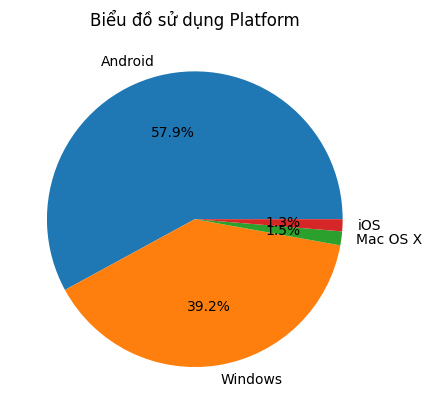

In [ ]:
#TẠO BIỂU ĐỒ SỬ DỤNG HỆ ĐIỀU HÀNH
count_by_OS = filternn_df['os'].value_counts()
plt.pie(count_by_OS, labels = count_by_OS.index, autopct='%1.1f%%')
plt.title("Biểu đồ sử dụng hệ điều hành")
plt.show()

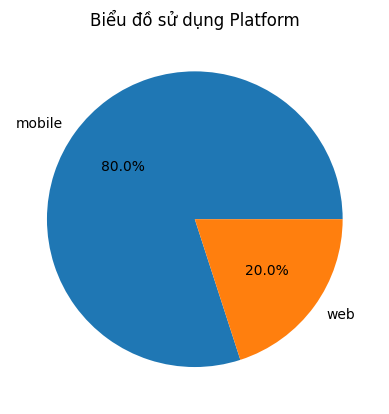

In [ ]:
#TẠO BIỂU ĐỒ SỬ DỤNG PLATFORM
count_by_platformS = filternn_df['platform'].value_counts()
plt.pie(count_by_platformS, labels = count_by_platformS.index, autopct='%1.1f%%')
plt.title("Biểu đồ sử dụng Platform")
plt.show()

In [ ]:
#Tạo bảng mới có các cột: Tổng Feature, Tổng sessions, Time_per_session theo từng user_id
C0grouped_df = filternn_df.groupby('user_id').agg({'feature' : 'sum', 'session': 'sum', 'time_per_session': 'sum'})
print(C0grouped_df)

         feature  session  time_per_session
user_id                                    
23          15.0      3.0        807.626667
24          10.0      4.0       1303.587786
31           9.0      5.0        696.553922
33          47.0     11.0       1190.855690
75          11.0      6.0        100.416667
...          ...      ...               ...
30606        6.0      2.0        235.062069
30616       48.0     10.0       2843.279010
30617        4.0      1.0        259.000000
30620        4.0      1.0       2111.000000
30630       79.0     92.0      15064.849680

[2203 rows x 3 columns]


In [ ]:
C0average_session = C0grouped_df['session'].mean()
print("Sessions trung bình: ", C0average_session)
C0average_tpsession = C0grouped_df['time_per_session'].mean()
print("Thời gian trung bình 1 session: ", C0average_tpsession)
C0average_feature = C0grouped_df['feature'].mean()
print("Feature trung bình: ", C0average_feature)


Sessions trung bình:  5.576486609169314
Thời gian trung bình 1 session:  1769.9898722683597
Feature trung bình:  15.768043576940535


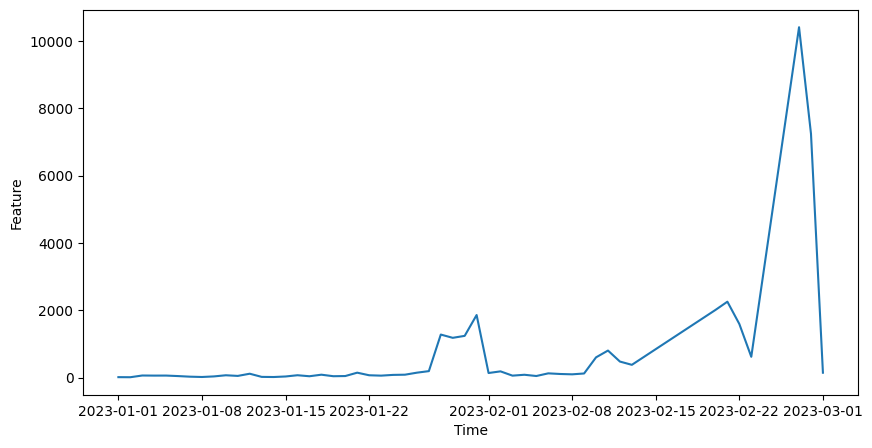

In [ ]:
#VẼ BIỂU ĐỒ TIME SERIES theo feature
C0feature_total = filternn_df.groupby(filternn_df['time'].dt.date)['feature'].sum()
plt.figure(figsize = (10,5))
plt.plot(C0feature_total.index, C0feature_total.values)
plt.xlabel('Time')
plt.ylabel('Feature')
plt.show()

**KẾT LUẬN VỀ CLUSTER 0:**

**- Đa phần các khách hàng đến từ châu Á (đến từ các nước không ban hành luật về crypto).**

**- Sử dụng hệ điều hành Android là chủ yếu dù giao dịch hay tương tác dịch vụ.**

**- Sử dụng Platform Mobile.**

**- Thời gian sử dụng app thấp (30p/ngày).**


**PHÂN TÍCH CLUSTER 1**

In [ ]:
#PHÂN TÍCH CLUSTER 1 (NHÓM KHÁCH HÀNG RỜI BỎ)
merged_df
C1filtered_df = merged_df.loc[merged_df['Cluster'] == 1]
C1filtered_df

In [ ]:
#Chuyển kiểu dữ liệu cột date thành datetime
C1filtered_df['date'] = pd.to_datetime(C1filtered_df['date'])

C1filtered_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,date,platform,volume,fee
174,28,41,2,10.123025,1,Pakistan,2023-01-19,android,5.063134,0.0
175,28,41,2,10.123025,1,Pakistan,2023-01-19,android,5.059891,0.0
176,30,6,2,0.005339,1,NaN,2023-02-23,android,0.003070,0.0
177,30,6,2,0.005339,1,NaN,2023-02-16,android,0.002269,0.0
253,48,10,40,0.000095,1,Pakistan,2023-02-14,android,0.000002,0.0
...,...,...,...,...,...,...,...,...,...,...
139050,30679,7,8,5.891152,1,Bangladesh,2023-02-07,android,0.121092,0.0
139051,30679,7,8,5.891152,1,Bangladesh,2023-01-31,android,0.107463,0.0
139052,30679,7,8,5.891152,1,Bangladesh,2023-01-19,android,0.190316,0.0
139053,30679,7,8,5.891152,1,Bangladesh,2023-02-16,android,0.022695,0.0


In [ ]:
C1user_id_count = C1filtered_df['user_id'].nunique()
C1country_count = C1filtered_df['Country'].nunique()
C1count = len(C1filtered_df)

C1count_by_country = C1filtered_df['Country'].value_counts()

print("Số lượng người giao dịch: ", C1user_id_count)
print("Số lượng nước: ", C1country_count)
print("Tổng giao dịch: ", C1count)
print("số lượng giao dịch của từng nước: \n", C1count_by_country)

Số lượng người giao dịch:  2265
Số lượng nước:  31
Tổng giao dịch:  15026
số lượng giao dịch của từng nước: 
 Pakistan                             4909
Indonesia                            3131
India                                1964
Bangladesh                           1397
Philippines                           347
Viet Nam                              139
Venezuela, Bolivarian Republic of     128
Singapore                              53
Hong Kong                              45
United States                          38
Germany                                25
Turkey                                 13
Malaysia                               12
Ukraine                                10
Korea, Republic of                     10
Netherlands                            10
Nigeria                                 7
Thailand                                4
Uzbekistan                              4
Yemen                                   4
Australia                               3
Kazakhst

Phần lớn các quốc gia đến từ châu Á.

,Country,transaction_count
17,Pakistan,4909
10,Indonesia,3131
9,India,1964
1,Bangladesh,1397
18,Philippines,347


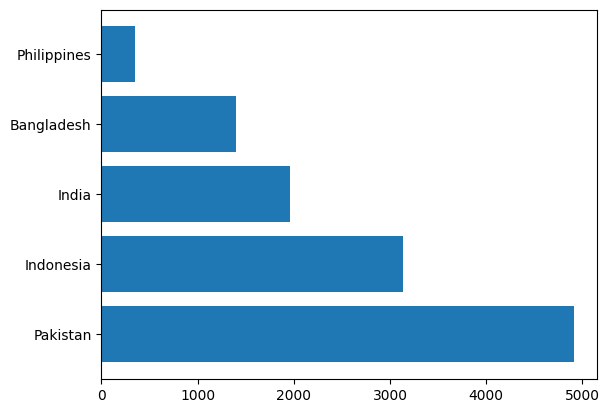

In [ ]:
grouped_C1T = C1filtered_df.groupby('Country').size().reset_index(name='transaction_count')
sorted_C1T = grouped_C1T.sort_values('transaction_count', ascending=False)
top_5_countries_C1T = sorted_C1T.head(5)
plt.barh(top_5_countries_C1T['Country'], top_5_countries_C1T['transaction_count'])
top_5_countries_C1T

,Country,user_count
10,Indonesia,549
9,India,413
17,Pakistan,359
1,Bangladesh,304
18,Philippines,137


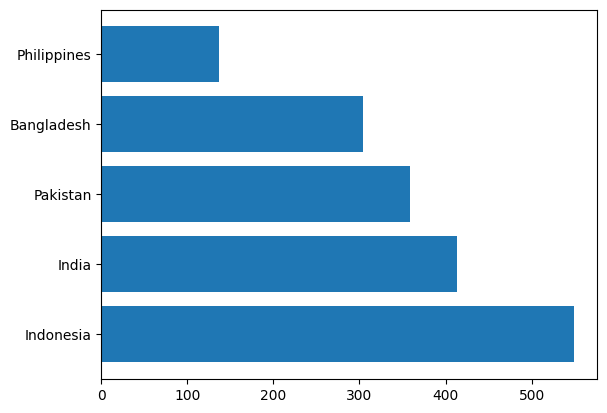

In [ ]:
grouped_C1C = C1filtered_df.groupby('Country')['user_id'].nunique().reset_index(name='user_count')
grouped_C1C

sorted_C1C = grouped_C1C.sort_values('user_count', ascending=False)
top_5_countriesC1 = sorted_C1C.head(5)

plt.barh(top_5_countriesC1['Country'], top_5_countriesC1['user_count'])
top_5_countriesC1

In [ ]:
#các platform có thể d khi thực hiện 1 transaction
C1value_counts = C1filtered_df['platform'].value_counts()
C1unique_values = C1value_counts.index
print(C1unique_values)

Index(['android', 'web', 'ios'], dtype='object')


In [ ]:
C1count_by_platform = C1filtered_df['platform'].value_counts()
print("Số lượng platform được sử dụng khi thực hiện transactions: \n", C1count_by_platform)

Số lượng platform được sử dụng khi thực hiện transactions: 
 android    14163
web          813
ios           50
Name: platform, dtype: int64


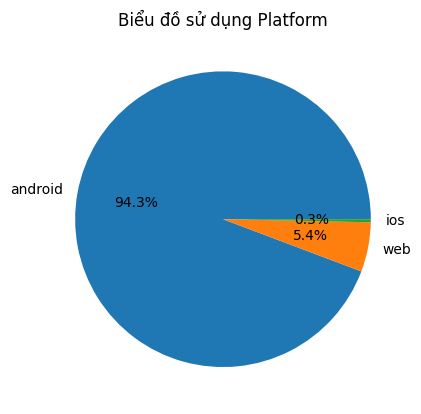

In [ ]:
plt.pie(C1count_by_platform, labels = C1count_by_platform.index, autopct='%1.1f%%')
plt.title("Biểu đồ sử dụng hệ điều hành")
plt.show()

94.3% giao dịch sử dụng nền tảng android.

In [ ]:
#Tạo cột thứ trong bảng C1fitered_df
C1filtered_df['weekday'] = C1filtered_df['date'].dt.weekday
C1weekday_mapping = {
    0: "Thứ 2",
    1: "Thứ 3",
    2: "Thứ 4",
    3: "Thứ 5",
    4: "Thứ 6",
    5: "Thứ 7",
    6: "Chủ Nhật"
                  }

C1filtered_df['weekday'] = C1filtered_df['weekday'].map(C1weekday_mapping)
print(C1filtered_df.head())

     user_id  Recency  Frequency  MonetaryValue  Cluster   Country       date  \
174       28       41          2      10.123025        1  Pakistan 2023-01-19   
175       28       41          2      10.123025        1  Pakistan 2023-01-19   
176       30        6          2       0.005339        1       NaN 2023-02-23   
177       30        6          2       0.005339        1       NaN 2023-02-16   
253       48       10         40       0.000095        1  Pakistan 2023-02-14   

    platform    volume  fee weekday  
174  android  5.063134  0.0   Thứ 5  
175  android  5.059891  0.0   Thứ 5  
176  android  0.003070  0.0   Thứ 5  
177  android  0.002269  0.0   Thứ 5  
253  android  0.000002  0.0   Thứ 3  


Text(0.5, 1.0, 'Transactions theo ngày')

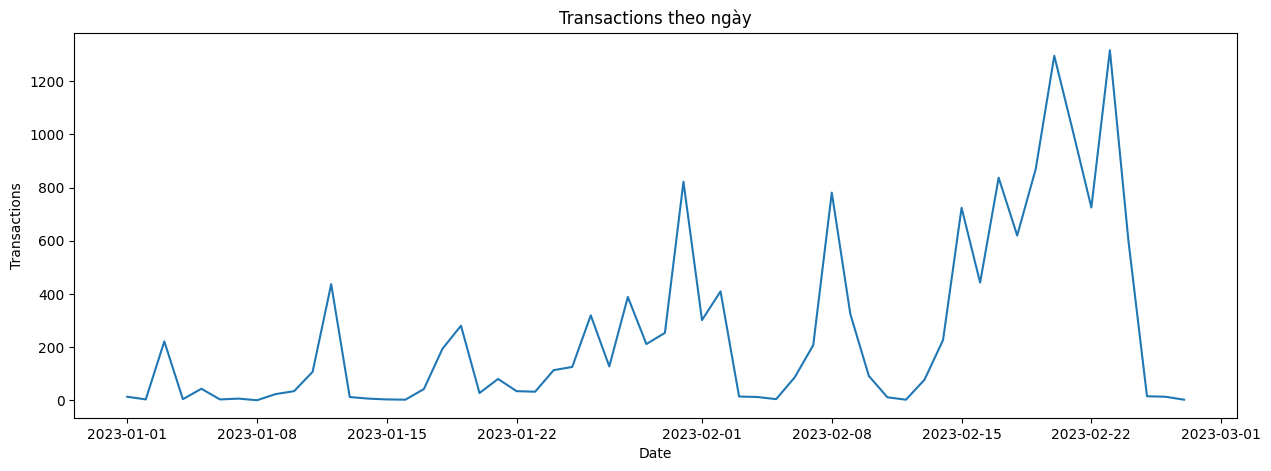

In [ ]:
#TẠO BẢNG TIME SERIES GIAO DỊCH
C1transactions_counts = C1filtered_df.groupby(C1filtered_df['date'].dt.date).size()
plt.figure(figsize = (15,5))
plt.plot(C1transactions_counts.index, C1transactions_counts.values)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Transactions theo ngày')

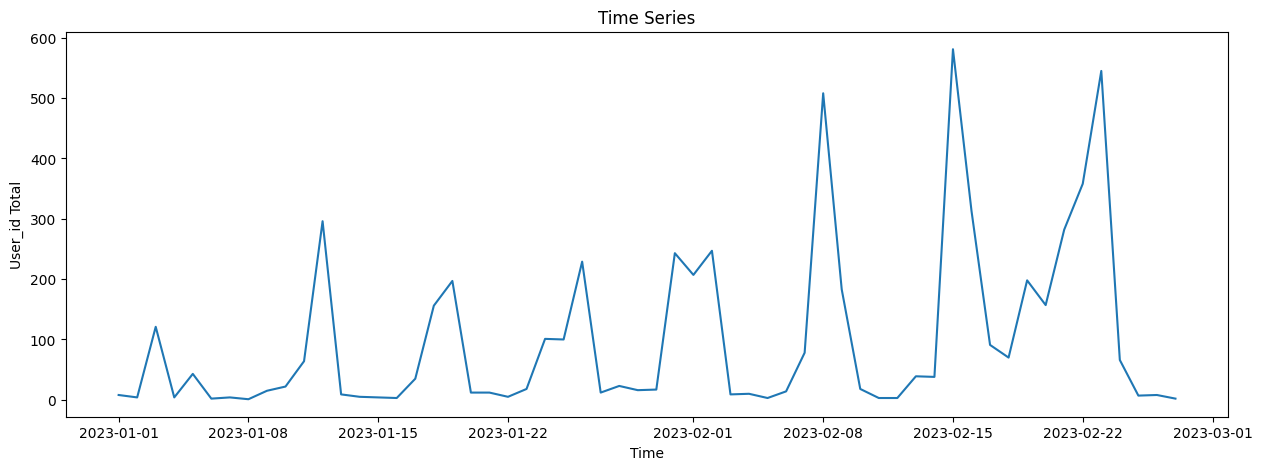

In [ ]:
C1user_id = C1filtered_df.groupby('date')['user_id'].nunique()
plt.figure(figsize = (15,5))
plt.plot(C1user_id.index, C1user_id.values)
plt.xlabel('Time')
plt.ylabel('User_id Total')
plt.title('Time Series')
plt.show()

In [ ]:
C1data = C1filtered_df.groupby('weekday')['volume'].sum().reset_index()
C1data['volume'] = C1data['volume'].astype(int)
C1data

,weekday,volume
0,Chủ Nhật,8757
1,Thứ 2,1283
2,Thứ 3,8151
3,Thứ 4,4685
4,Thứ 5,5245
5,Thứ 6,1362
6,Thứ 7,993


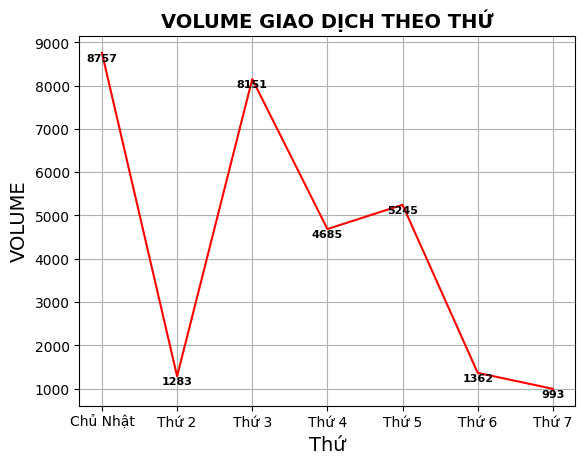

In [ ]:
plt.plot(C1data['weekday'], C1data['volume'], color = 'red')
plt.title('VOLUME GIAO DỊCH THEO THỨ', fontsize = 14, fontweight = 'bold')
plt.xlabel('Thứ', fontsize = 14)
plt.ylabel('VOLUME', fontsize = 14)
plt.grid(True)

for i, v in enumerate(C1data['volume']):
  plt.text(i, v, str(v), ha='center', va='top', fontsize=8, fontweight='bold')

plt.show()

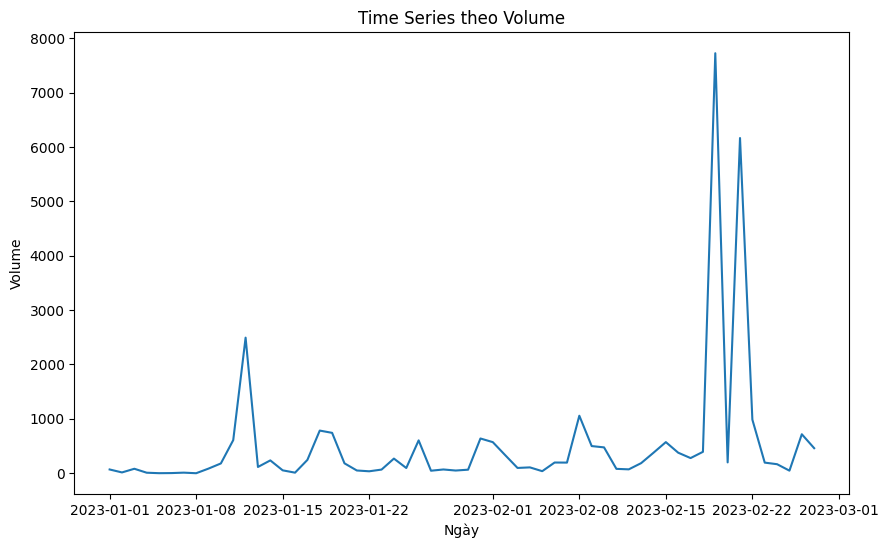

In [ ]:
C1daily_volume = C1filtered_df.groupby('date').sum()
plt.figure(figsize=(10,6))
plt.plot(C1daily_volume.index, C1daily_volume['volume'])
plt.title('Time Series theo Volume')
plt.xlabel('Ngày')
plt.ylabel('Volume')
plt.show()

In [ ]:
# Nối bảng Cluster với bảng Sessions
C1merge_df = df_RFM.merge(df_userinfo, left_on = 'user_id', right_on = 'user_id', how = 'left')
C1filter_df = C1merge_df.loc[C1merge_df['Cluster'] == 1]
C1filter_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
11,28,41,2,10.123025,1,Pakistan,mobile,Faisalabad,Android,PK,2/8/2023,2/8/2023,2.0,1.0,4.000000
12,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,1/24/2023,1/24/2023,2.0,1.0,40.000000
13,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,1/25/2023,1/25/2023,2.0,1.0,12.000000
14,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,1/11/2023,1/11/2023,6.0,1.0,46.000000
15,28,41,2,10.123025,1,Pakistan,mobile,Faisalabad,Android,PK,1/30/2023,1/30/2023,5.0,2.0,1156.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49584,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2/22/2023,2/22/2023,2.0,1.0,36.000000
49585,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,1/31/2023,1/31/2023,4.0,1.0,905.000000
49586,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,1/13/2023,1/13/2023,4.0,1.0,169.000000
49587,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,1/19/2023,1/19/2023,7.0,2.0,1097.000000


In [ ]:
#Chuyển kiểu dữ liệu của time, date về datetime
C1filter_df['time'] = pd.to_datetime(C1filter_df['time'])
C1filter_df['date'] = pd.to_datetime(C1filter_df['date'])
C1filter_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
11,28,41,2,10.123025,1,Pakistan,mobile,Faisalabad,Android,PK,2023-02-08,2023-02-08,2.0,1.0,4.000000
12,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,2023-01-24,2023-01-24,2.0,1.0,40.000000
13,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,2023-01-25,2023-01-25,2.0,1.0,12.000000
14,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,2023-01-11,2023-01-11,6.0,1.0,46.000000
15,28,41,2,10.123025,1,Pakistan,mobile,Faisalabad,Android,PK,2023-01-30,2023-01-30,5.0,2.0,1156.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49584,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-02-22,2023-02-22,2.0,1.0,36.000000
49585,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-01-31,2023-01-31,4.0,1.0,905.000000
49586,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-01-13,2023-01-13,4.0,1.0,169.000000
49587,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-01-19,2023-01-19,7.0,2.0,1097.000000


In [ ]:
#Tạo bảng mới không có giá trị NaN
C1filternn_df = C1filter_df.dropna(subset = ['session', 'feature', 'time_per_session', 'date'])
C1filternn_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
11,28,41,2,10.123025,1,Pakistan,mobile,Faisalabad,Android,PK,2023-02-08,2023-02-08,2.0,1.0,4.000000
12,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,2023-01-24,2023-01-24,2.0,1.0,40.000000
13,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,2023-01-25,2023-01-25,2.0,1.0,12.000000
14,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,2023-01-11,2023-01-11,6.0,1.0,46.000000
15,28,41,2,10.123025,1,Pakistan,mobile,Faisalabad,Android,PK,2023-01-30,2023-01-30,5.0,2.0,1156.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49584,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-02-22,2023-02-22,2.0,1.0,36.000000
49585,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-01-31,2023-01-31,4.0,1.0,905.000000
49586,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-01-13,2023-01-13,4.0,1.0,169.000000
49587,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-01-19,2023-01-19,7.0,2.0,1097.000000


In [ ]:
C1filternn_df = C1filternn_df.drop_duplicates(subset=['user_id', 'time'], keep='first')
C1filternn_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
11,28,41,2,10.123025,1,Pakistan,mobile,Faisalabad,Android,PK,2023-02-08,2023-02-08,2.0,1.0,4.000000
12,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,2023-01-24,2023-01-24,2.0,1.0,40.000000
13,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,2023-01-25,2023-01-25,2.0,1.0,12.000000
14,28,41,2,10.123025,1,Pakistan,mobile,Bahawalpur,Android,PK,2023-01-11,2023-01-11,6.0,1.0,46.000000
15,28,41,2,10.123025,1,Pakistan,mobile,Faisalabad,Android,PK,2023-01-30,2023-01-30,5.0,2.0,1156.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49584,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-02-22,2023-02-22,2.0,1.0,36.000000
49585,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-01-31,2023-01-31,4.0,1.0,905.000000
49586,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-01-13,2023-01-13,4.0,1.0,169.000000
49587,30679,7,8,5.891152,1,Bangladesh,mobile,Dhaka,Android,BD,2023-01-19,2023-01-19,7.0,2.0,1097.000000


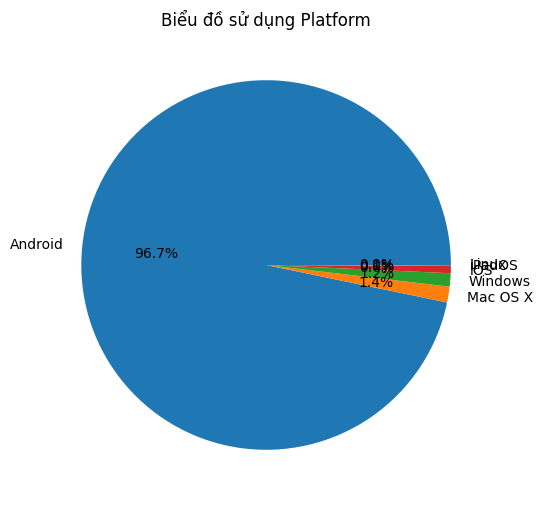

In [ ]:
#VẼ BIỂU ĐỒ SỬ DỤNG HỆ ĐIỀU HÀNH
count_by_OSC1 = C1filternn_df['os'].value_counts()
plt.figure(figsize = (10,6))
plt.pie(count_by_OSC1, labels = count_by_OSC1.index, autopct='%1.1f%%')
plt.title("Biểu đồ sử dụng hệ điều hành")
plt.show()

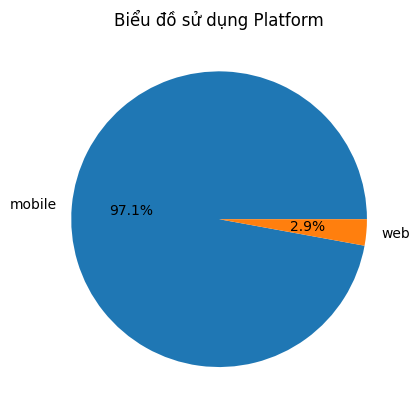

In [ ]:
#VẼ BIỂU ĐỒ SỬ DỤNG PLATFORM
count_by_platformSC1 = C1filternn_df['platform'].value_counts()
plt.pie(count_by_platformSC1, labels = count_by_platformSC1.index, autopct='%1.1f%%')
plt.title("Biểu đồ sử dụng Platform")
plt.show()

In [ ]:
#Tạo bảng mới có các cột: Tổng Feature, Tổng sessions, Time_per_session theo từng user_id
C1grouped_df = C1filternn_df.groupby('user_id').agg({'feature' : 'sum', 'session': 'sum', 'time_per_session': 'sum'})
print(C1grouped_df)

         feature  session  time_per_session
user_id                                    
28          53.0     20.0       3529.240461
48          19.0      7.0       1368.489845
49          17.0      8.0       1059.428571
51          25.0      8.0       1109.210526
73          86.0     26.0       5059.849498
...          ...      ...               ...
30626       32.0     11.0        276.266667
30629       29.0     13.0       1080.210526
30645        8.0      1.0        507.000000
30669        4.0      1.0         13.000000
30679       41.0     15.0       4986.226639

[1816 rows x 3 columns]


In [ ]:
C1average_session = C1grouped_df['session'].mean()
print("Sessions trung bình: ", C1average_session)
C1average_tpsession = C1grouped_df['time_per_session'].mean()
print("Thời gian trung bình 1 session: ", C1average_tpsession)
C1average_feature = C1grouped_df['feature'].mean()
print("Feature trung bình: ", C1average_feature)
C1sum_feature = C1grouped_df['feature'].sum()


Sessions trung bình:  8.822136563876652
Thời gian trung bình 1 session:  1596.2058478994188
Feature trung bình:  26.751101321585903


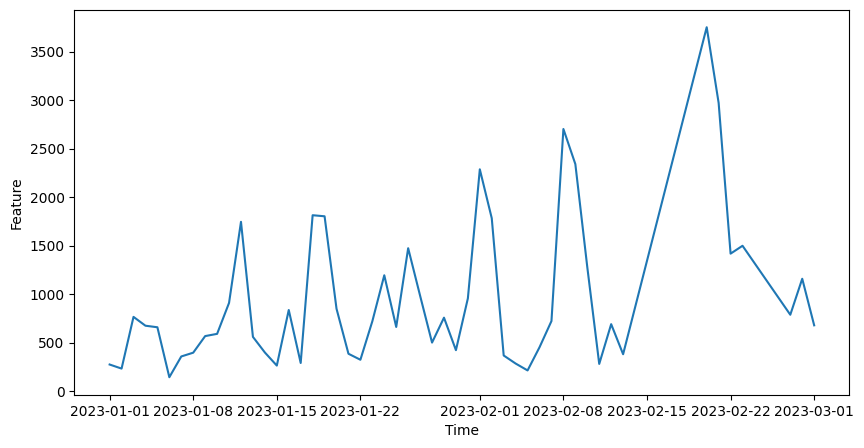

In [ ]:
#VẼ BIỂU ĐỒ TIME SERIES theo feature
C1feature_total = C1filternn_df.groupby(C1filternn_df['time'].dt.date)['feature'].sum()
plt.figure(figsize = (10,5))
plt.plot(C1feature_total.index, C1feature_total.values)
plt.xlabel('Time')
plt.ylabel('Feature')
plt.show()

CLUSTER 1: KHÁCH HÀNG RỜI BỎ
Nhóm khách hàng này có những đặc điểm:
- Đa phần là người Châu Á (đến từ các nước không ban hành luật về crypto).
- Sử dụng hệ điều hành Android là phổ biến dù giao dịch hay tương tác dịch vụ.
- Sử dụng platform Mobile.
- Thời gian sử dụng app thấp (Tần suất 26p/ngày).
- Thường tương tác dịch vụ để làm quen app hoặc theo dõi thông tin thị trường.


**Ở đây, mình đã chia volume của traders thành từng tuần. Nhưng mình chưa tìm lại được file code nên mình sẽ bổ sung sau nhé ^^**

**- Với mỗi giao dịch nhỏ hơn 100$, họ là very small trader.**

**- Với mỗi giao dịch từ 100$ đến 1000$, thì họ là small trader.**

**- Với mỗi giao dịch từ 1000$ đến 10000$, thì họ là medium trader.**

**- Với mỗi giao dịch lớn hơn 10000$, thì họ là big trader.**

In [ ]:
#XÁC ĐỊNH VOLUME ĐẦU TƯ THEO TỪNG TUẦN CỦA TỪNG KHÁCH HÀNG
df_trader = pd.read_csv('pivot_data_xacdinhtrader.csv')
df_trader

,user_id,Tuần 1,Tuần 2,Tuần 3,Tuần 4,Tuần 5,Tuần 6,Tuần 7,Tuần 8,Tuần 9
0,4.0,0.0,0.0,0.0,0.0,Small trader,0.0,0.0,Medium trader,Medium trader
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,Very small trader
2,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,Very small trader
3,28.0,0.0,0.0,Small trader,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,Very small trader,0.0
...,...,...,...,...,...,...,...,...,...,...
5646,30644.0,0.0,0.0,0.0,Medium trader,0.0,0.0,0.0,0.0,0.0
5647,30645.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0
5648,30664.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0
5649,30669.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0,0.0


In [ ]:
trader_merge_df = df_RFM.merge(df_trader, left_on = 'user_id', right_on = 'user_id', how = 'left')
trader_merge_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,Tuần 1,Tuần 2,Tuần 3,Tuần 4,Tuần 5,Tuần 6,Tuần 7,Tuần 8,Tuần 9
0,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",0.0,0.0,0.0,0.0,Small trader,0.0,0.0,Medium trader,Medium trader
1,23,1,35,0.182284,0,Indonesia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,Very small trader
2,24,2,37,0.812294,0,Viet Nam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,Very small trader
3,28,41,2,10.123025,1,Pakistan,0.0,0.0,Small trader,0.0,0.0,0.0,0.0,0.0,0.0
4,30,6,2,0.005339,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,Very small trader,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,30644,34,1,1038.607788,3,Viet Nam,0.0,0.0,0.0,Medium trader,0.0,0.0,0.0,0.0,0.0
5647,30645,10,10,0.000031,1,Pakistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0
5648,30664,4,10,0.000027,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0
5649,30669,15,10,0.000019,1,Pakistan,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0,0.0


In [ ]:
trader_merge_df = trader_merge_df.drop(['Recency', 'Frequency', 'MonetaryValue'], axis = 1)

In [ ]:
trader_merge_df

,user_id,Cluster,Country,Tuần 1,Tuần 2,Tuần 3,Tuần 4,Tuần 5,Tuần 6,Tuần 7,Tuần 8,Tuần 9
0,4,2,"Venezuela, Bolivarian Republic of",0.0,0.0,0.0,0.0,Small trader,0.0,0.0,Medium trader,Medium trader
1,23,0,Indonesia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,Very small trader
2,24,0,Viet Nam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,Very small trader
3,28,1,Pakistan,0.0,0.0,Small trader,0.0,0.0,0.0,0.0,0.0,0.0
4,30,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,Very small trader,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5646,30644,3,Viet Nam,0.0,0.0,0.0,Medium trader,0.0,0.0,0.0,0.0,0.0
5647,30645,1,Pakistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0
5648,30664,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0
5649,30669,1,Pakistan,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0,0.0


In [ ]:
#TẠO RA FILE TRADER THEO TUẦN VỚI CLUSTER = 0
C0trader_merge_df = trader_merge_df.loc[trader_merge_df['Cluster'] == 0]
C0trader_merge_df

In [ ]:
C0trader_merge_df.to_csv('C0trader_merge_df.csv', index=True)

In [ ]:
#TẠO RA FILE TRADER THEO TUẦN VỚI CLUSTER = 1
C1trader_merge_df = trader_merge_df.loc[trader_merge_df['Cluster'] == 1]
C1trader_merge_df

,user_id,Cluster,Country,Tuần 1,Tuần 2,Tuần 3,Tuần 4,Tuần 5,Tuần 6,Tuần 7,Tuần 8,Tuần 9
3,28,1,Pakistan,0.0,0.0,Small trader,0.0,0.0,0.0,0.0,0.0,0.0
4,30,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,Very small trader,0.0
7,48,1,Pakistan,0.0,0.0,0.0,Very small trader,0.0,0.0,Very small trader,Very small trader,0.0
8,49,1,Indonesia,0.0,0.0,Small trader,0.0,0.0,0.0,0.0,0.0,0.0
9,51,1,Nigeria,0.0,0.0,0.0,Small trader,0.0,0.0,0.0,0.0,Small trader
...,...,...,...,...,...,...,...,...,...,...,...,...
5643,30626,1,Philippines,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0,0.0,0.0
5644,30629,1,Indonesia,0.0,0.0,0.0,0.0,Very small trader,0.0,0.0,0.0,0.0
5647,30645,1,Pakistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0
5649,30669,1,Pakistan,0.0,0.0,0.0,0.0,0.0,0.0,Very small trader,0.0,0.0


In [ ]:
C1trader_merge_df.to_csv('C1trader_merge_df.csv', index=True)

**Sau khi lọc ra theo các CLUSTER, mình tiến hành theo dõi sự thay đổi từng tuần của traders. Từ đó, mình chia ra được 2 tệp: khách hàng không thay đổi lượng volume giao dịch và khách hàng thay đổi lượng volume giao dịch.**

In [ ]:
uploaded = files.upload()

Saving filtered_df_thaydoi.csv to filtered_df_thaydoi.csv
Saving khach_ko_thaydoi.csv to khach_ko_thaydoi (1).csv


In [ ]:
df_nochange = pd.read_csv('khach_ko_thaydoi.csv')
df_changed = pd.read_csv('filtered_df_thaydoi.csv')

In [ ]:
df_changed

,Unnamed: 0,user_id,tong_hop,thay doi
0,0,4,122,sm
1,10,61,1222,sm
2,13,83,12221,sm
3,25,141,11222,sm
4,31,179,12,sm
...,...,...,...,...
307,5557,30181,12221,sm
308,5558,30183,2221,ms
309,5610,30436,2221,ms
310,5621,30496,21,ms


In [ ]:
nochange_merge_df = df_RFM.merge(df_nochange, left_on = 'user_id', right_on = 'user_id', how = 'left')
nochange_merge_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,trader
0,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",NaN
1,23,1,35,0.182284,0,Indonesia,Small trader
2,24,2,37,0.812294,0,Viet Nam,Small trader
3,28,41,2,10.123025,1,Pakistan,Small trader
4,30,6,2,0.005339,1,NaN,Small trader
...,...,...,...,...,...,...,...
5646,30644,34,1,1038.607788,3,Viet Nam,Medium trader
5647,30645,10,10,0.000031,1,Pakistan,Small trader
5648,30664,4,10,0.000027,0,NaN,Small trader
5649,30669,15,10,0.000019,1,Pakistan,Small trader


In [ ]:
df_nochange

,Unnamed: 0,user_id,trader
0,1,23,Small trader
1,2,24,Small trader
2,3,28,Small trader
3,4,30,Small trader
4,5,31,Small trader
...,...,...,...
5331,5646,30644,Medium trader
5332,705,3658,Big trader
5333,853,4427,Big trader
5334,2507,12370,Big trader


In [ ]:
df_nochange = df_nochange.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df_nochange

,user_id,trader
0,23,Small trader
1,24,Small trader
2,28,Small trader
3,30,Small trader
4,31,Small trader
...,...,...
5331,30644,Medium trader
5332,3658,Big trader
5333,4427,Big trader
5334,12370,Big trader


In [ ]:
df_changed

,Unnamed: 0,user_id,tong_hop,thay doi
0,0,4,122,sm
1,10,61,1222,sm
2,13,83,12221,sm
3,25,141,11222,sm
4,31,179,12,sm
...,...,...,...,...
307,5557,30181,12221,sm
308,5558,30183,2221,ms
309,5610,30436,2221,ms
310,5621,30496,21,ms


In [ ]:
df_changed = df_changed.drop(['Unnamed: 0'], axis = 1)

In [ ]:
changed_merge_df = df_RFM.merge(df_changed, left_on = 'user_id', right_on = 'user_id', how = 'left')
changed_merge_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,tong_hop,thay doi
0,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",122.0,sm
1,23,1,35,0.182284,0,Indonesia,NaN,NaN
2,24,2,37,0.812294,0,Viet Nam,NaN,NaN
3,28,41,2,10.123025,1,Pakistan,NaN,NaN
4,30,6,2,0.005339,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5646,30644,34,1,1038.607788,3,Viet Nam,NaN,NaN
5647,30645,10,10,0.000031,1,Pakistan,NaN,NaN
5648,30664,4,10,0.000027,0,NaN,NaN,NaN
5649,30669,15,10,0.000019,1,Pakistan,NaN,NaN


In [ ]:
count_RFM = len(df_RFM)

In [ ]:
count_RFM

5651

In [ ]:
C0changed_merge_df = changed_merge_df.loc[changed_merge_df['Cluster'] == 0]
C0changed_merge_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,tong_hop,thay doi
1,23,1,35,0.182284,0,Indonesia,NaN,NaN
2,24,2,37,0.812294,0,Viet Nam,NaN,NaN
5,31,2,13,0.000067,0,Pakistan,NaN,NaN
6,33,1,62,0.000186,0,Pakistan,NaN,NaN
12,75,1,1,0.000003,0,Pakistan,NaN,NaN
...,...,...,...,...,...,...,...,...
5639,30616,1,60,0.000180,0,Pakistan,NaN,NaN
5640,30617,2,12,1.148408,0,Israel,NaN,NaN
5641,30620,2,10,0.958263,0,France,NaN,NaN
5645,30630,1,79,28.282582,0,Viet Nam,NaN,NaN


In [ ]:
C0changed_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 1 to 5648
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2309 non-null   int64  
 1   Recency        2309 non-null   int64  
 2   Frequency      2309 non-null   int64  
 3   MonetaryValue  2309 non-null   float64
 4   Cluster        2309 non-null   int64  
 5   Country        2215 non-null   object 
 6   tong_hop       0 non-null      float64
 7   thay doi       0 non-null      object 
dtypes: float64(2), int64(4), object(2)
memory usage: 162.4+ KB


In [ ]:
C4changed_merge_df = changed_merge_df.loc[changed_merge_df['Cluster'] == 3]
C4changed_merge_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,tong_hop,thay doi
17,92,33,1,1052.542039,3,Viet Nam,NaN,NaN
19,101,37,1,1067.278692,3,Viet Nam,NaN,NaN
31,179,37,3,1325.984249,3,Viet Nam,12.0,sm
39,246,48,10,554.699229,3,United Kingdom,NaN,NaN
41,269,30,21,1075.003216,3,Viet Nam,NaN,NaN
...,...,...,...,...,...,...,...,...
5596,30360,33,1,1052.350044,3,Viet Nam,NaN,NaN
5605,30414,30,21,1270.258353,3,"Venezuela, Bolivarian Republic of",NaN,NaN
5621,30496,9,11,1011.360717,3,Indonesia,21.0,ms
5622,30508,29,21,1071.237137,3,Viet Nam,NaN,NaN


In [ ]:
C4changed_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 17 to 5646
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        757 non-null    int64  
 1   Recency        757 non-null    int64  
 2   Frequency      757 non-null    int64  
 3   MonetaryValue  757 non-null    float64
 4   Cluster        757 non-null    int64  
 5   Country        752 non-null    object 
 6   tong_hop       26 non-null     float64
 7   thay doi       26 non-null     object 
dtypes: float64(2), int64(4), object(2)
memory usage: 53.2+ KB


In [ ]:
nochange_merge_df = df_RFM.merge(df_nochange, left_on = 'user_id', right_on = 'user_id', how = 'left')
nochange_merge_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,trader
0,4,2,102,4710.457994,2,"Venezuela, Bolivarian Republic of",NaN
1,23,1,35,0.182284,0,Indonesia,Small trader
2,24,2,37,0.812294,0,Viet Nam,Small trader
3,28,41,2,10.123025,1,Pakistan,Small trader
4,30,6,2,0.005339,1,NaN,Small trader
...,...,...,...,...,...,...,...
5646,30644,34,1,1038.607788,3,Viet Nam,Medium trader
5647,30645,10,10,0.000031,1,Pakistan,Small trader
5648,30664,4,10,0.000027,0,NaN,Small trader
5649,30669,15,10,0.000019,1,Pakistan,Small trader


In [ ]:
C0nochange_merge_df = nochange_merge_df.loc[nochange_merge_df['Cluster'] == 0]
C0nochange_merge_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,trader
1,23,1,35,0.182284,0,Indonesia,Small trader
2,24,2,37,0.812294,0,Viet Nam,Small trader
5,31,2,13,0.000067,0,Pakistan,Small trader
6,33,1,62,0.000186,0,Pakistan,Small trader
12,75,1,1,0.000003,0,Pakistan,Small trader
...,...,...,...,...,...,...,...
5639,30616,1,60,0.000180,0,Pakistan,Small trader
5640,30617,2,12,1.148408,0,Israel,Small trader
5641,30620,2,10,0.958263,0,France,Small trader
5645,30630,1,79,28.282582,0,Viet Nam,Small trader


In [ ]:
C0nochange_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 1 to 5648
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2309 non-null   int64  
 1   Recency        2309 non-null   int64  
 2   Frequency      2309 non-null   int64  
 3   MonetaryValue  2309 non-null   float64
 4   Cluster        2309 non-null   int64  
 5   Country        2215 non-null   object 
 6   trader         2309 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 144.3+ KB


In [ ]:
C1nochange_merge_df = nochange_merge_df.loc[nochange_merge_df['Cluster'] == 1]
C1nochange_merge_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,trader
3,28,41,2,10.123025,1,Pakistan,Small trader
4,30,6,2,0.005339,1,NaN,Small trader
7,48,10,40,0.000095,1,Pakistan,Small trader
8,49,41,1,5.602616,1,Indonesia,Small trader
9,51,3,2,36.052488,1,Nigeria,Small trader
...,...,...,...,...,...,...,...
5643,30626,21,2,0.418750,1,Philippines,Small trader
5644,30629,27,2,0.340525,1,Indonesia,Small trader
5647,30645,10,10,0.000031,1,Pakistan,Small trader
5649,30669,15,10,0.000019,1,Pakistan,Small trader


In [ ]:
C1changed_merge_df = changed_merge_df.loc[changed_merge_df['Cluster'] == 1]
C1changed_merge_df

,user_id,Recency,Frequency,MonetaryValue,Cluster,Country,tong_hop,thay doi
3,28,41,2,10.123025,1,Pakistan,NaN,NaN
4,30,6,2,0.005339,1,NaN,NaN,NaN
7,48,10,40,0.000095,1,Pakistan,NaN,NaN
8,49,41,1,5.602616,1,Indonesia,NaN,NaN
9,51,3,2,36.052488,1,Nigeria,NaN,NaN
...,...,...,...,...,...,...,...,...
5643,30626,21,2,0.418750,1,Philippines,NaN,NaN
5644,30629,27,2,0.340525,1,Indonesia,NaN,NaN
5647,30645,10,10,0.000031,1,Pakistan,NaN,NaN
5649,30669,15,10,0.000019,1,Pakistan,NaN,NaN


**Dựa vào những thay đổi, có thể thấy được rằng:**

**- Đối với CLUSTER 0, tất cả nhóm này đều là small trader đi kèm với đó là giao dịch rất ít. Có lẽ, họ chỉ là những người mang tâm lý FOMO vì chỉ khi thị trường có biến động họ mới thực hiện giao dịch.**

**- Đối với CLUSTER 1, họ là những small trader với giao dịch khá đều. Thường sẽ chỉ sử dụng app để trade vào những ngày thường, ít biến động với volume nhỏ. Khi thị trường biến động mạnh mẽ, có thể họ đã vào những app khác để sử dụng và tiến hành giao dịch??**


**TỪ NHỮNG PHÂN TÍCH TRÊN, MÌNH CÓ ĐƯA RA CÁC CHIẾN LƯỢC CHO ỨNG DỤNG VÍ CRYPTO ĐỂ PHÙ HỢP VỚI TỪNG NHÓM KHÁCH HÀNG.**

**ĐỐI VỚI NHÓM 0: NHÓM KHÁCH HÀNG MỚI**

**- Update giao diện di động dễ sử dụng: Đảm bảo ứng dụng có giao diện thân thiện, dễ sử dụng trên hệ điều hành Android và platform Mobile.**

**- Cung cấp thông tin thị trường và tin tức: Đáp ứng tâm lý FOMO bằng việc cung cấp thông tin thị trường và tin tức cập nhật liên quan đến crypto.**

**- Giáo dục và tư vấn: Cung cấp tài liệu giáo dục và tư vấn về giao dịch crypto để khách hàng nắm bắt cơ bản và tăng khả năng giao dịch.**

**- Tích hợp tính năng xã hội: Xây dựng cộng đồng trong ứng dụng để khách hàng tương tác và chia sẻ kinh nghiệm.**

**- Chương trình khuyến mãi và thưởng: Sử dụng khuyến mãi và thưởng để khích lệ giao dịch, có thể miễn phí phí giao dịch trong 5 lần đầu tiên.**

**ĐỐI VỚI NHÓM 1: NHÓM KHÁCH HÀNG RỜI BỎ**

**- Cải thiện trải nghiệm người dùng: Cải thiện hiệu suất và giao diện ứng dụng.**
**- Cung cấp tính năng độc đáo: Cung cấp giá trị gia tăng và tính năng không có ở những app khác nhưng phải dễ sử dụng.**

**- Xây dựng cộng đồng sôi động trên ứng dụng: Tạo ra cộng đồng trên ứng dụng, khuyến khích khách hàng tương tác, chia sẻ thông tin và trao đổi kinh nghiệm với nhau.**

**- Chăm sóc khách hàng định kỳ: Thường xuyên liên hệ và chăm sóc khách hàng qua app. Gửi email thông báo về tin tức thị trường, cập nhật sản phẩm mới hoặc cung cấp hỗ trợ cá nhân hóa.**

**- Tăng cường tính bảo mật: Đảm bảo rằng ứng dụng tuân thủ các tiêu chuẩn bảo mật cao nhất. Bảo vệ thông tin và tài sản của khách hàng.**

**- Đổi mới và cập nhật liên tục: Tiếp tục phát triển và cập nhật ứng dụng nhưng vẫn phải giữ lại các bước thao tác giao dịch như ban đầu để khách hàng không cảm thấy lạ sau mỗi lần cập nhật.**

--------------------------------------------------------------------------------

Trên đây là toàn bộ phần phân tích của mình. Vì đây là dự án thực tế đầu tiên mình được trải nghiệm, nên còn rất nhiều sai sót. Ví dụ như mình đã làm mất một số file xử lí dữ liệu ở phần phân tích gần cuối.

Nếu có ý kiến đóng góp, các bạn có thể gửi qua mail của mình: phuleankhang@gmail.com.